# 1. Introduction

In order to contribute to the acquisition of sEMG data,
particularly from devices that do not require professional
calibration, we developed a sizeable sEMG database. Our
database, MyoUP, was inspired by the Ninapro database and
all of the recorded hand-gestures, presented in "URL", are
identical to some of the Ninapro "URL". The recording device
we used was the Myo Armband, by Thalmic labs. The Myo
Armband is a relatively cheap and easy-to-wear device, with
a sampling frequency of 200Hz and 8 dry sEMG channels
that has been widely adopted in scientific research.}

# 2. MyoUP Dataset

The MyoUP database contains recordings from 8 intact
subjects (3 females, 5 males; 1 left handed, 7 right handed;
age 22.38 ± 1.06 years). The acquisition process was
divided into three parts: 5 basic finger movements, 12
isotonic and isometric hand configurations and 5 grasping
hand-gestures. Volunteers became accustomed with the
procedure before performing each set of exercises. Subjects
were instructed to repeat each gesture 5 times, for a 5sec
period, interleaved with 5sec interruptions to avoid muscle
fatigue. A supervisor assisted the subjects in wearing the
Myo Armband to their dominant hand so that the device
would be placed in a comfortable position for the subject
and the device would detect the sEMG signals accurately.
The sEMG was visible to the subject on a screen along with
a picture of the hand-gesture that had to be performed.

The sEMG recordings are located in the "MyoUP" file and divided into three different files (E1, E2 and E3). E1, E2 and E3 contain the sEMG recordings of the 5 "basic finger movements", the 12 "isotonic and the isometric hand configurations" and the 5 "grasping hand-gestures" respectively. The sEMG signals have been stored in .mat format, along with useful information (e.g. subject's age, gender, etc).

# 3. Loading Data

In [43]:
import scipy.io
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [26]:
data = scipy.io.loadmat('MyoUP/E1/s1e1.mat')

In [49]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Sat Dec 22 10:02:06 2018',
 '__version__': '1.0',
 '__globals__': [],
 'age': array([[22]], dtype=uint8),
 'emg': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 'gender': array(['female'], dtype='<U6'),
 'pulse': array([[0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'set': array(['E1'], dtype='<U2'),
 'subject': array([[1]], dtype=uint8)}

In [27]:
sEMG_recording = data['emg']

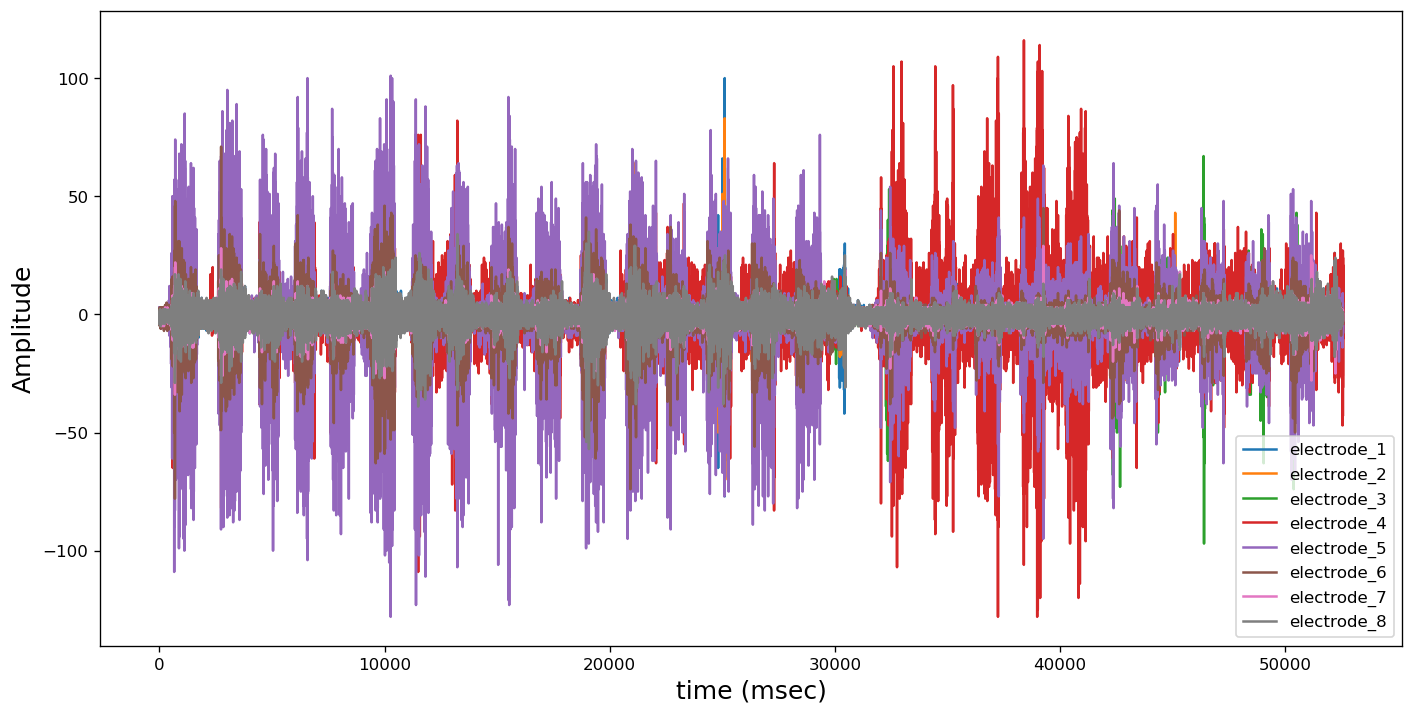

In [28]:
plt.figure(figsize=(14, 7), dpi=120, facecolor='w', edgecolor='k')
plt.plot(sEMG_recording)
plt.xlabel('time (msec)', fontsize = 15)
plt.ylabel('Amplitude', fontsize = 15)
plt.legend(['electrode_1', 'electrode_2', 'electrode_3', 'electrode_4',
            'electrode_5', 'electrode_6', 'electrode_7', 'electrode_8'])
plt.show()

# 4. Sliding Window Method

Recordings from the Myo Armband consist of 8 sEMG signals,
one from each sensor. A sliding window of length
150ms and 60% overlap was applied to construct the
CNN input images. This way, images were constructed
with a resolution of 8 x 15. 

In order to avoid overfitting and increase the model’s
accuracy, data augmentation was applied, thus doubling the
number of images. More specifically, images were used
twice in training, once in their original form and once with
Additive Gaussian White Noise, with SNR equal to 30dB.

Finally, the partition of the images into training,
validation and testing sets was based on the repetition of
each hand-gesture during the recording. Repetition 1 was used
for validation, repetition 2 for testing and the remaining
three for training.

The .mat structs contain a pulse signal, which consists of '0's and '100's. By multiplying the sEMG signal with the pulse signal, noise between hand-gestures is iliminated while at the same time the rest of the signal is amplified. 

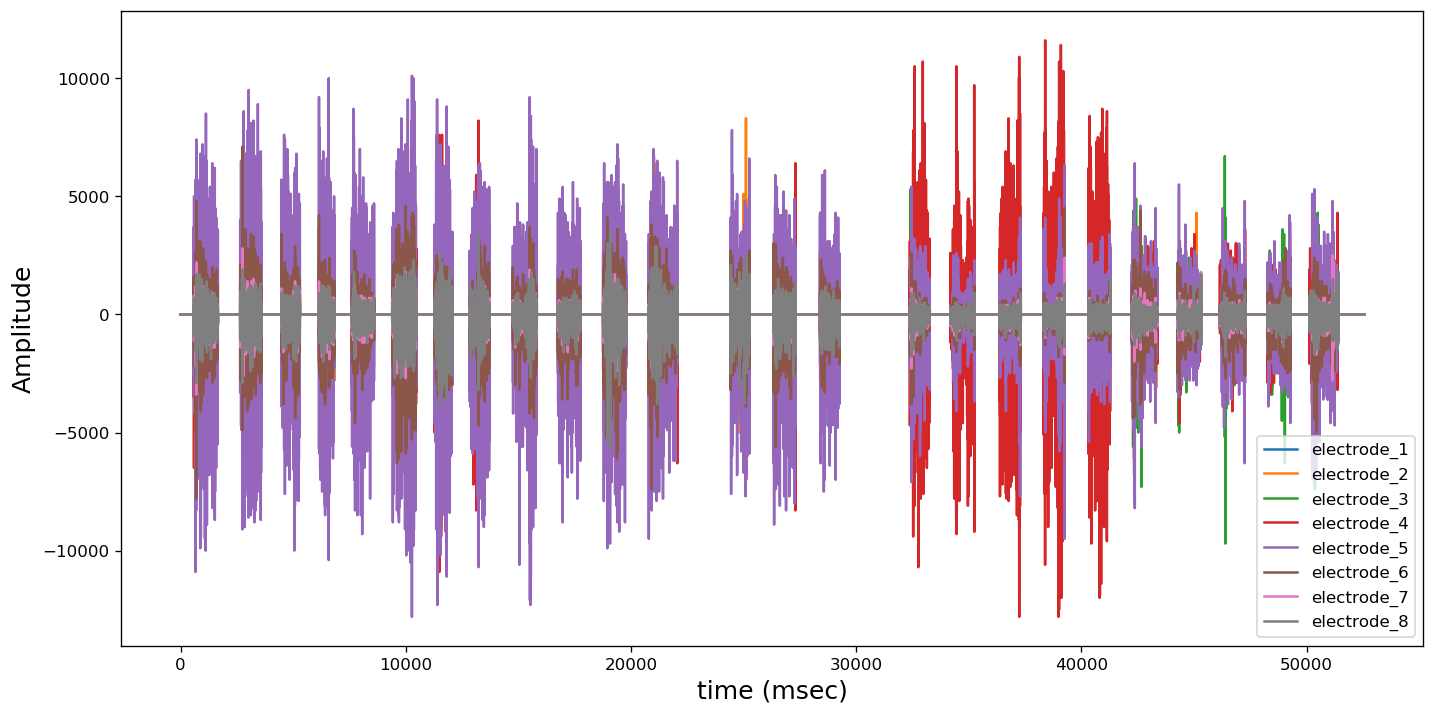

In [31]:
n_electrodes = 8
for electrode in range(n_electrodes):
    sEMG_recording[:, electrode] = data['pulse'] * sEMG_recording[:, electrode] / 100 # Ignore the '100' if you do not 
                                                                                      # wish to change the Amplitude
plt.figure(figsize=(14, 7), dpi=120, facecolor='w', edgecolor='k')
plt.plot(sEMG_recording)
plt.xlabel('time (msec)', fontsize = 15)
plt.ylabel('Amplitude', fontsize = 15)
plt.legend(['electrode_1', 'electrode_2', 'electrode_3', 'electrode_4',
            'electrode_5', 'electrode_6', 'electrode_7', 'electrode_8'])
plt.show()

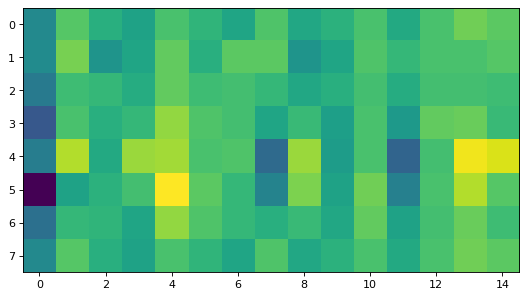

In [47]:
t, duration = 10000, 15
img = sEMG_recording[t : t + duration, :]

plt.figure(figsize=(8, 15), dpi=80)
plt.imshow(np.swapaxes(img,0,1))
plt.show()

# 5. Conclusions

The reason we decided to use the Myo Armband is that
even though the performance in classification tasks was not
high enough when the Ninapro Myo Armband recordings
were used, the perks, that the Myo Armband possesses,
demand that we investigate whether it can perform better.
For this purpose, we opted for hand-gestures that have both
diverse sEMG signals and practical applications, such as the
“medium diameter grasp”.

We tested how accurately our architecture can classify
12 hand gestures from the Ninapro DB5 dataset (URL) compared to how
well it can classify the exact same hand gestures from the
MyoUP database. The DB5 dataset, contains data from two Myo
Armbands that are recorded simultaneously. We made our
comparison using the Myo Armband that produced the
highest accuracy. 

After training the same CNN with both the DB5 dataset, from the
Ninapro database, and our database, the latter resulted to
much higher accuracy. More specifically, the MyoUP
database produced an accuracy of 78.98% (test set), which was
approximately 23.7% higher than the one produced by the
DB5 dataset. For this experiment, we trained our network
with the same number of images in each case. Thus, 130K
images were extracted from 8 subjects and 5 repetitions
(randomly selected in the case of DB5).